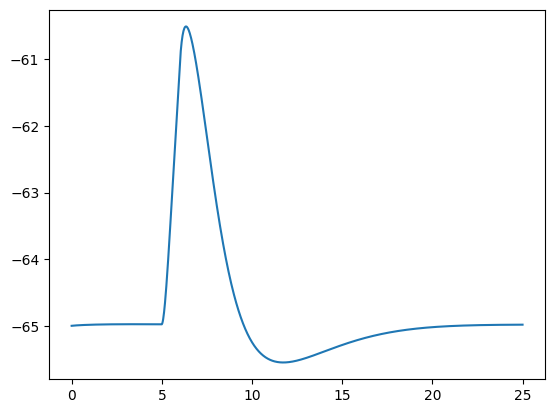

In [11]:
from neuron import h, gui
from neuron.units import ms, mV
import matplotlib.pyplot as plt

%matplotlib inline

def main() -> None:
    h.load_file('stdrun.hoc')
    stim = h.IClamp(my_cell.dend(1))
    stim.get_segment()
    stim.delay = 5
    stim.dur = 1
    stim.amp = 0.1
    soma_v = h.Vector().record(my_cell.soma(0.5)._ref_v)
    t = h.Vector().record(h._ref_t)
    h.finitialize(-65 * mV)
    h.continuerun(25 * ms)
    f = plt.figure()
    plt.plot(t, soma_v)
    plt.show(f)

class BallAndStick:
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()
    def _setup_morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.all = [self.soma, self.dend]
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157
        self.dend.L = 200
        self.dend.diam = 1
    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 100    # Axial resistance in Ohm * cm
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        self.soma.insert('hh')                                          
        for seg in self.soma:
            seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
            seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
            seg.hh.gl = 0.0003    # Leak conductance in S/cm2
            seg.hh.el = -54.3     # Reversal potential in mV
        # Insert passive current in the dendrite                       # <-- NEW
        self.dend.insert('pas')                                        # <-- NEW
        for seg in self.dend:                                          # <-- NEW
            seg.pas.g = 0.001  # Passive conductance in S/cm2          # <-- NEW
            seg.pas.e = -65    # Leak reversal potential mV            # <-- NEW 
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

my_cell = BallAndStick(0)

main()